# Notebook Intentions

The purpose of this notebook is to simulate an amusement park. 


In [1]:
from park import Park
from behavior_reference import BEHAVIOR_ARCHETYPE_PARAMETERS

### Book Keeping

    - Version: dictates the location performance graphs are stored
    - Verbosity: controls much information is displayed during a simulation, increase to show more info
    - Show Plots: controls whether park plots are displayed in this notebook
    - RNG Seed: seeds random number generators to enforce identical results across runs/machines
    

In [2]:
VERSION = "20K All FP - MIKE"
VERBOSITY = 0
SHOW_PLOTS = True


## Park
 
The park contains Agents, Attractions and Activities.

- Total Daily Agents: dictates how many agents visit the park within a day
- Hourly Percent: dictates what percentage of Total Daily Agents visits the park at each hour
- Perfect Arrivals: enforces that the exact amount of Total Daily Agents arrives during the day
- Expedited Pass Ability Percent: percent of agents aware of expeditied passes
- Expedited Threshold: acceptable queue wait time length before searching for an expedited pass
- Expedited Limit: total number of expedited pass an agent can hold at any given time


In [3]:
TOTAL_DAILY_AGENTS = 40000
PERFECT_ARRIVALS = True
HOURLY_PERCENT = {
    "10:00 AM": 10,
    "11:00 AM": 20,
    "12:00 AM": 17,
    "3:00 PM": 20,
    "4:00 PM": 15,
    "5:00 PM": 10,
    "6:00 PM": 1,
    "7:00 PM": 5,
    "8:00 PM": 1,
    "9:00 PM": 1,
    "10:00 PM": 0,
    "11:00 PM": 0,
    "12:00 PM": 0
}
EXP_ABILITY_PCT = 0.7
EXP_THRESHOLD = 1
EXP_LIMIT = 1

## Agents

The park is populated by agents. Agents visit attractions and activities. They make decisions about where to go based on their preferences, the popularity of attractions and activities and waiting times. Each Agent has a behavioral archetype.

- Ride Enthusiast: wants to stay for a long time, go on as many attractions as possible, doesn't want to visit activites, doesn't mind waiting
- Ride Favorer: wants to go on a lot of attractions, but will vists activites occasionally, will wait for a while in a queue
- Park Tourer: wants to stay for a long time and wants to see attractions and activities equally, reasonable about wait times
- Park Visitor: doesn't want to stay long and wants to see attractions and activities equally, inpatient about wait times
- Activity Favorer: doesn't want to stay long and prefers activities, reasonable about wait times
- Activity Enthusiast: wants to visit a lot of activities, reasonable about wait times

Archetypes can be tweaked and new archetypes can be added in `behavior_reference.py`. 

- Agent Archetype Distribution: dictates the probability an agent will have a particular behavioral archetype


In [4]:
AGENT_ARCHETYPE_DISTRIBUTION = {
    "ride_enthusiast": 10,
    "ride_favorer": 15,
    "park_tourer": 25,
    "park_visitor": 30,
    "activity_favorer": 15,
    "activity_enthusiast": 5,
}


## Attractions

Attractions are essentially rides within a park. 

- Attractions: list of dictionaries that describe the attractions within the park
    - Name: name of the attraction
    - Run Time: How long the attraction take to run, in minutes
    - Capacity: Maximium number of agents that can be on the attraction during a run
    - Popularity: Value from 1-10 that describes how popular an attraction is with respect to other attractions
    - Expedited Queue: Dictates whether the attraction has an expedited queue or not
    - Expedited Queue Ratio: Dictates what percentage of attraction capacity is devoted to members of the expedited queue
    - Child Eligible: Dictates whether children can ride the attraction
    - Adult Eligible: Dictates whether adults can ride the attraction

In [5]:
ATTRACTIONS = [
    {
        "name": "Python",
        "run_time": 2, #2.133
        "hourly_throughput": 1440,
        "popularity": 6.875,
        "expedited_queue": False,   #
        "expedited_queue_ratio": 0.99,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 45,
    },
    {
        "name": "Joris en de Draak",
        "run_time": 2,
        "hourly_throughput": 1700,
        "popularity": 9.113, 
        "expedited_queue": False,   #
        "expedited_queue_ratio": 0.99,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 56,
    },
    {
        "name": "Vliegende Hollander",
        "run_time": 4, #3.7167
        "hourly_throughput": 1900,
        "popularity": 10,
        "expedited_queue": False,  #
        "expedited_queue_ratio": 0.99,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 53.4,
    },
    {
        "name": "Baron 1898",
        "run_time": 2, #2.16666666666
        "hourly_throughput": 900,
        "popularity": 4.756, 
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 59.5,
    },
    {
        "name": "Kinderspoor",
        "run_time": 2,
        "hourly_throughput": 420,
        "popularity": 1.176, #1.096
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": False,
        "expected_wait_time": 21,
    },
    {
        "name": "De oude tufferbaan",
        "run_time": 4,
        "hourly_throughput": 1200,
        "popularity": 4.774,
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 30,
    },
    {
        "name": "Halve maan",
        "run_time": 3,
        "hourly_throughput": 1200,
        "popularity": 4.774,
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 31.4,
    },
    {
        "name": "Pirana",
        "run_time": 7, #6.5
        "hourly_throughput": 2000,
        "popularity": 8.897, 
        "expedited_queue": False,   #
        "expedited_queue_ratio": 0.99,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 36.4,
    },
    {
        "name": "Max & Moritz",
        "run_time": 2, #1.5
        "hourly_throughput": 1800,
        "popularity": 8.363, 
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 41.4,
    },
    {
        "name": "Fata Morgana",
        "run_time": 8,
        "hourly_throughput": 1600,
        "popularity": 6.47, 
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 29.3,
    },
    {
        "name": "Fabula",
        "run_time": 17,
        "hourly_throughput": 1760,
        "popularity": 6.087, 
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 16.7,
    },
    {
        "name": "Volk_van_Laaf_(Monorail)",
        "run_time": 7,
        "hourly_throughput": 425,
        "popularity": 1.390,
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 30.4,
    },
    {
        "name": "Stoomcarrousel",
        "run_time": 2,
        "hourly_throughput": 400,
        "popularity": 1,
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 16,
    },
    {
        "name": "Droomvlucht",
        "run_time": 6,
        "hourly_throughput": 1775,
        "popularity": 8.447, 
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 44.4,
    },
    {
        "name": "Villa_Volta",
        "run_time": 10,
        "hourly_throughput": 1200,
        "popularity": 4.511, 
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 26,
    },
    {
        "name": "Sirocco",
        "run_time": 8,
        "hourly_throughput": 1000,
        "popularity": 4, #3.502
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 20.3,
    },
    {
        "name": "Vogel_Rok",
        "run_time": 2, #1.520
        "hourly_throughput": 1600,
        "popularity": 6.680, 
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 32,
    },
    {
        "name": "Carnaval_Festival",
        "run_time": 8,
        "hourly_throughput": 1750,
        "popularity": 7.062, 
        "expedited_queue": False,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 28.6,
    },
    {
        "name": "Symbolica",
        "run_time": 10,
        "hourly_throughput": 1400,
        "popularity": 6.779, 
        "expedited_queue": False,  #
        "expedited_queue_ratio": 0.99,
        "child_eligible": True,
        "adult_eligible": True,
        "expected_wait_time": 46.6,
    }
]

## Activities
Activities are everything to do within the park that isn't an attraction. 

- Activities: list of dictionaries that describe activities within the park
    - Name: name of the activity
    - Popularity: Value from 1-10 that describes how popular an activity is with respect to other activities
    - Mean Time: The expected time agents will spend at an activity

In [6]:
ACTIVITIES = [
    {
      "name": "sightseeing",
      "popularity": 5,
      "mean_time": 5
    },
    {
      "name": "show",
      "popularity": 5,
      "mean_time": 30
    },
    {
      "name": "merchandise",
      "popularity": 5,
      "mean_time": 30
    },
    {
      "name": "food",
      "popularity": 5,
      "mean_time": 45
    }
  ]

## Plots

Set the Y limit of plots

In [7]:
PLOT_RANGE = {
    "Attraction Queue Length": 20000,
    "Attraction Wait Time": 100,
    "Attraction Expedited Queue Length": 6000,
    "Attraction Expedited Wait Time": 500,
    "Activity Vistors": 20000,
    "Approximate Agent Distribution (General)": 1.0,
    "Approximate Agent Distribution (Specific)": 1.0,
    "Attraction Average Wait Times": 120,
    "Agent Attractions Histogram": 1.0,
    "Attraction Total Visits": 46000,
    "Expedited Pass Distribution": 150000,
    "Age Class Distribution": 20000,
}

## Simulation

Run the simulation here.

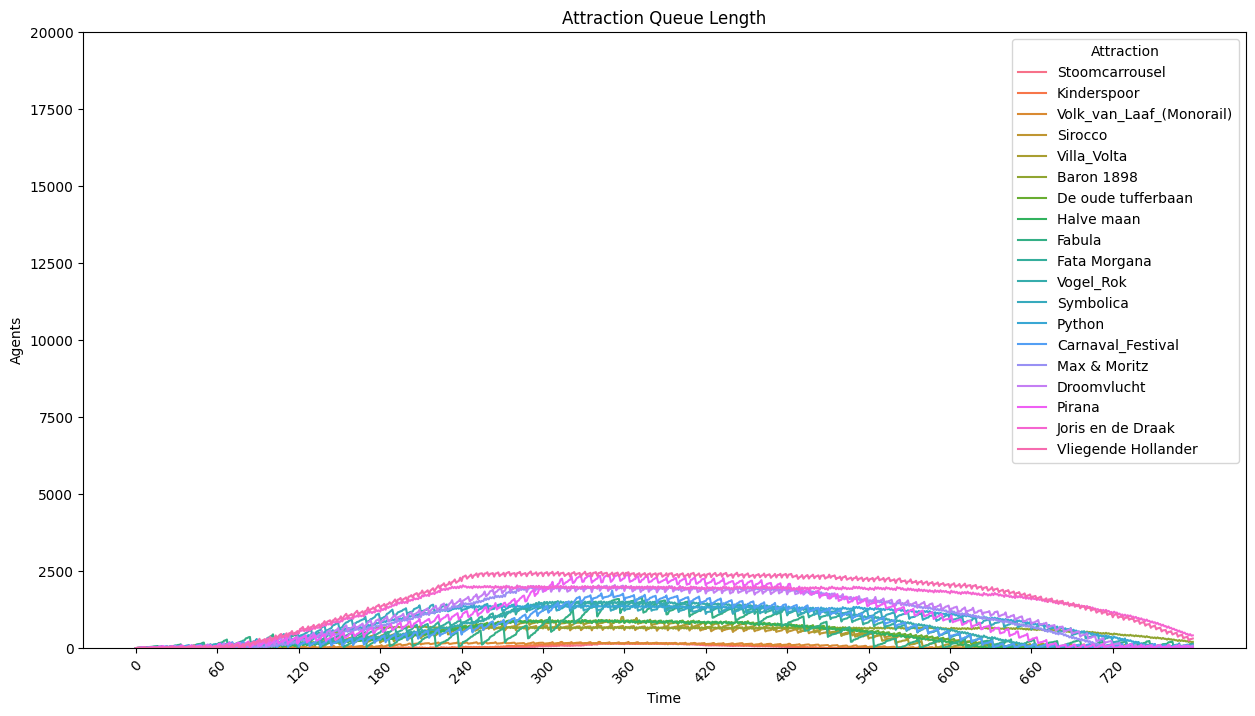

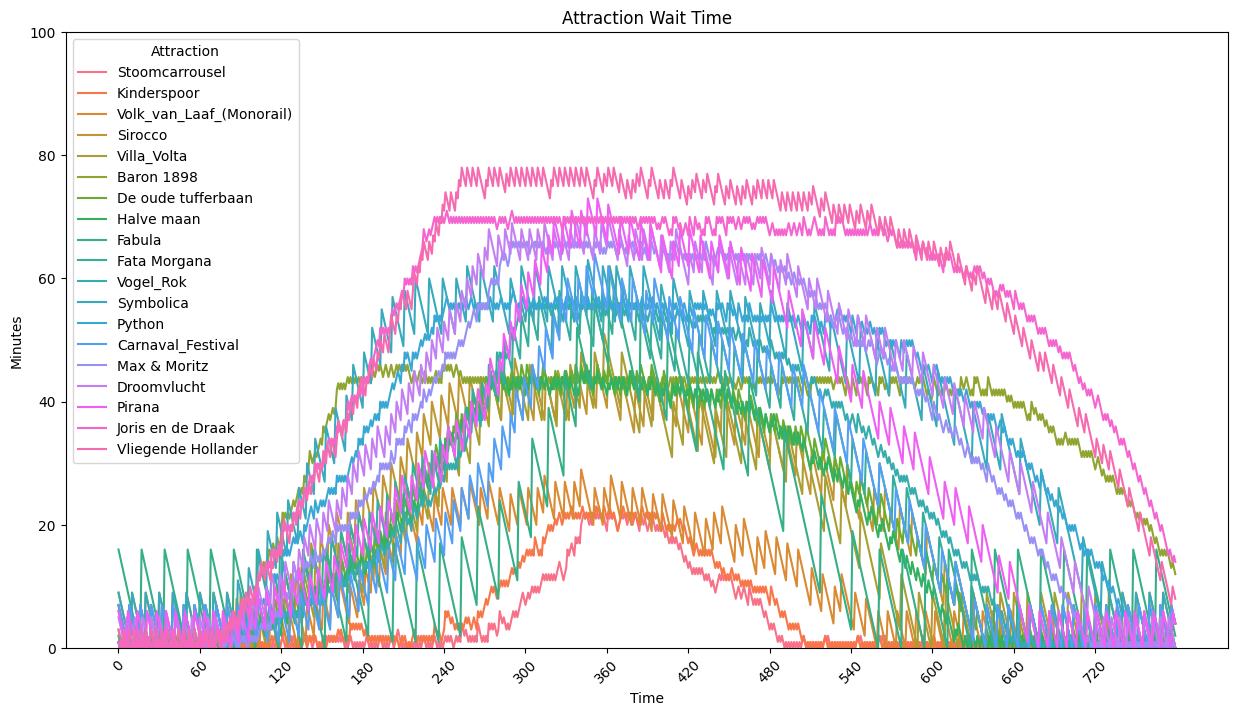

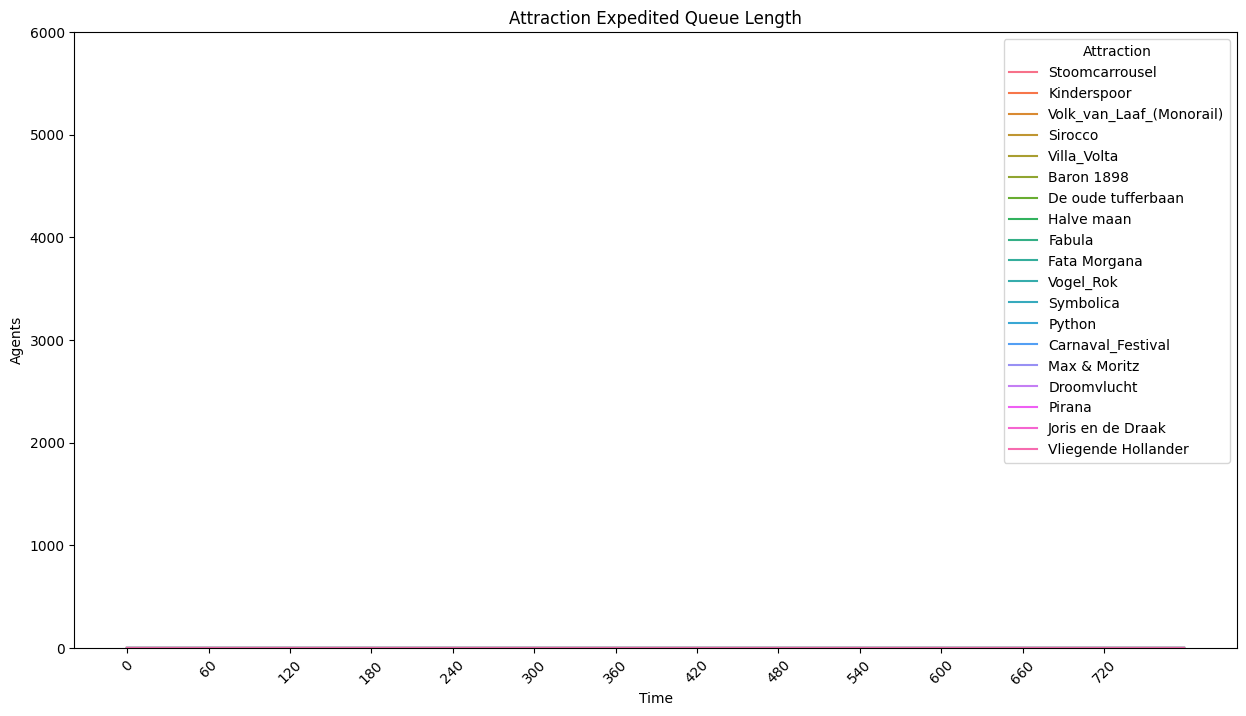

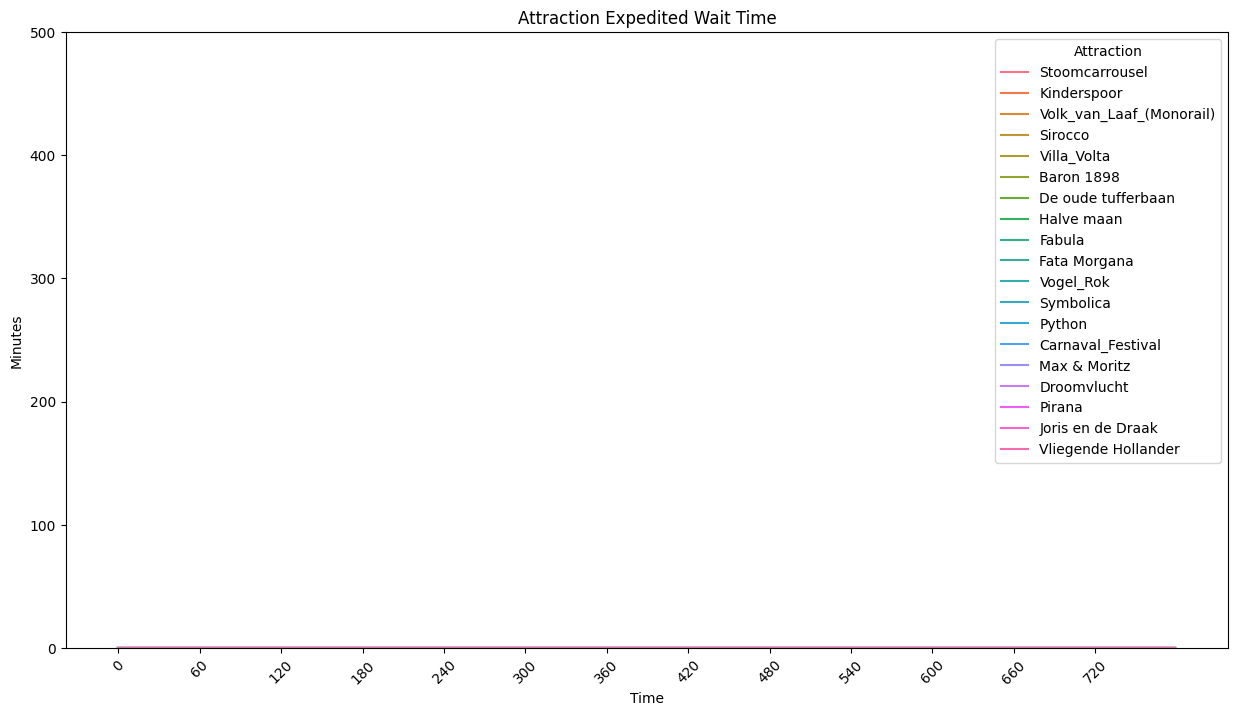

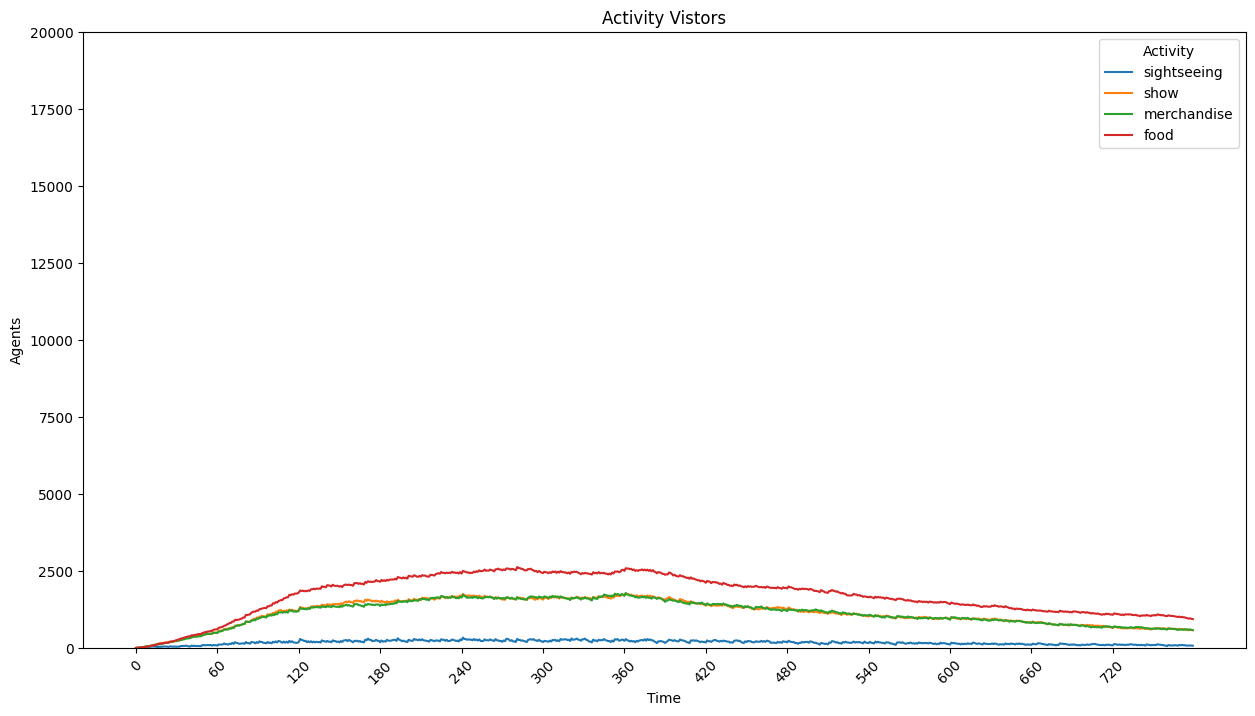

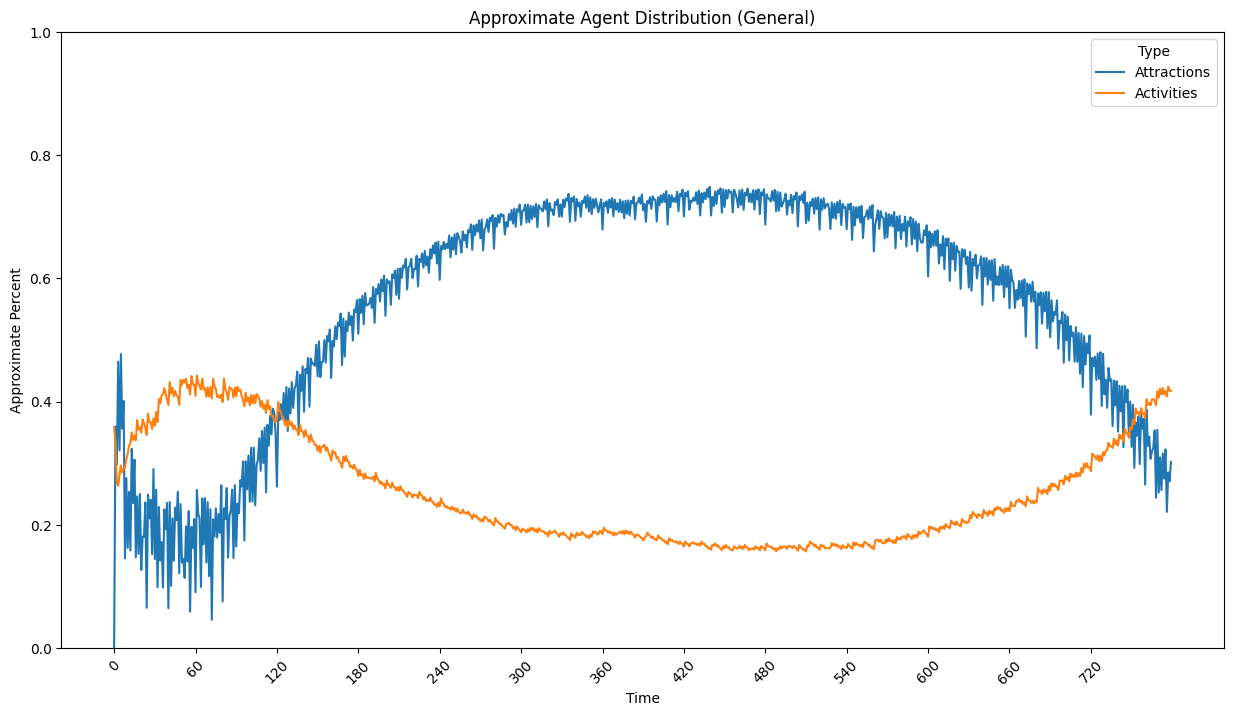

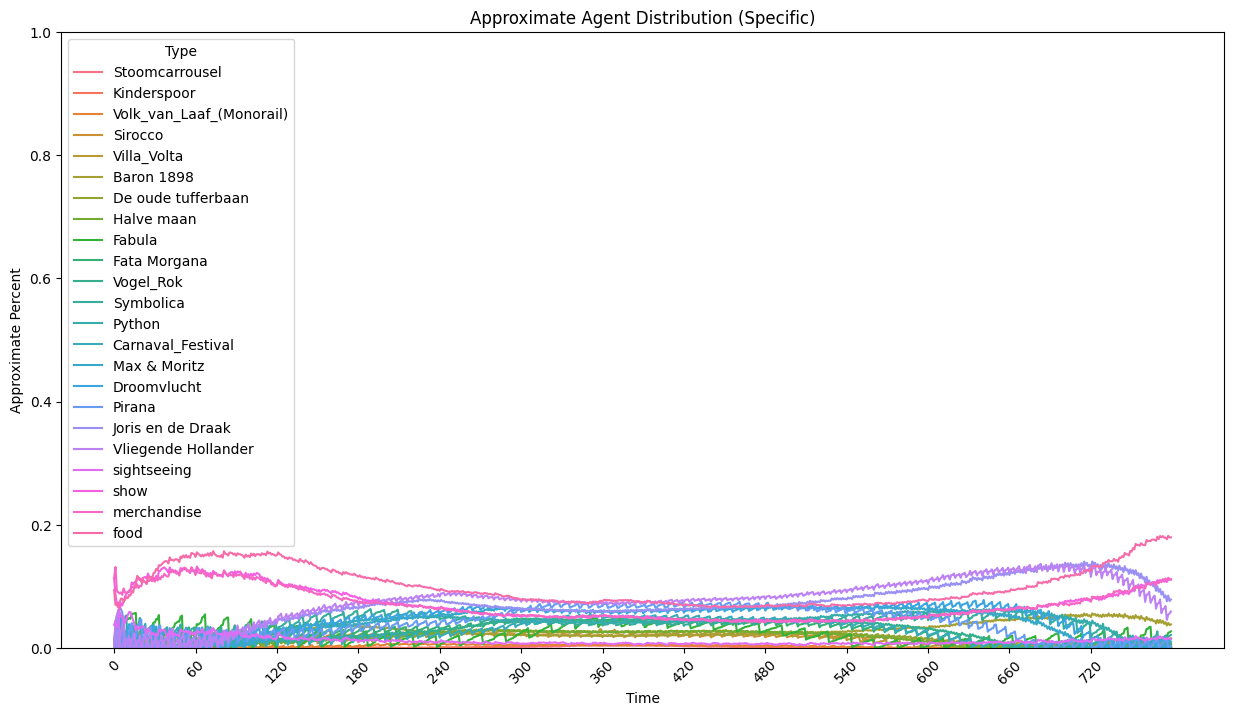

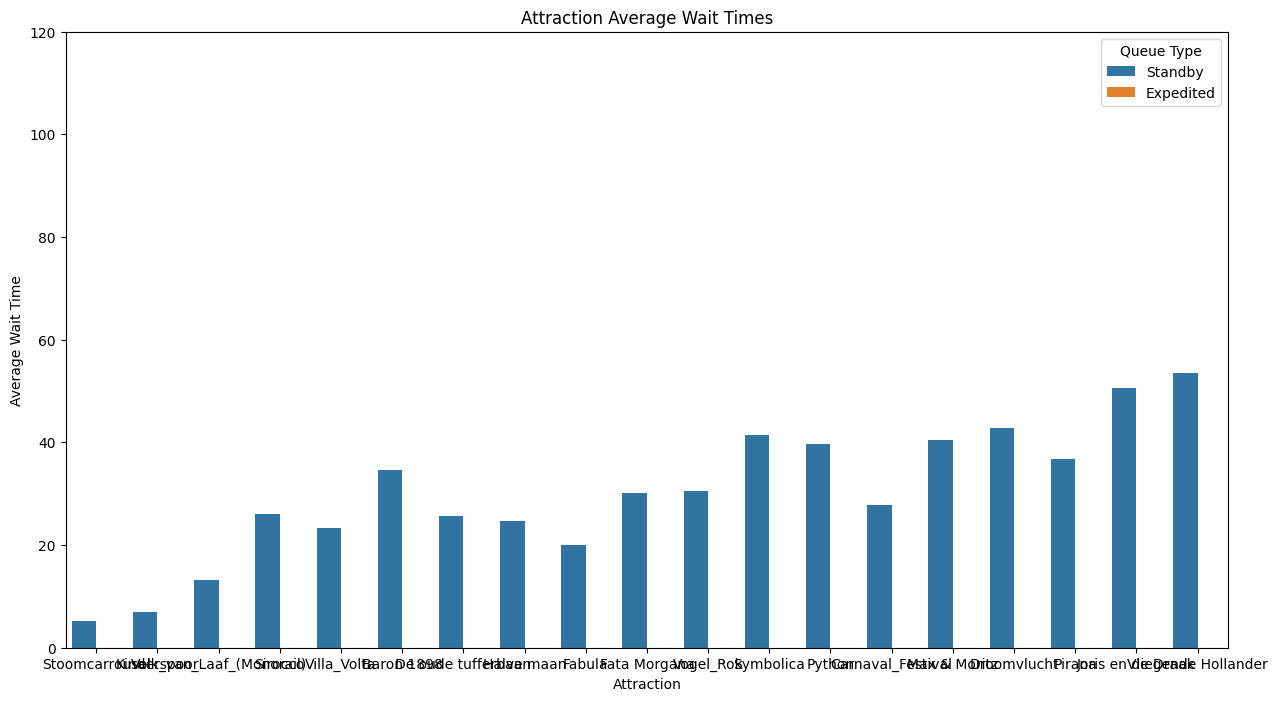

+--------------------------+---------------------+--------------+
| Attraction               |   Average Wait Time | Queue Type   |
|--------------------------+---------------------+--------------|
| Vliegende Hollander      |                0.00 | Expedited    |
| Vogel_Rok                |                0.00 | Expedited    |
| Fata Morgana             |                0.00 | Expedited    |
| Carnaval_Festival        |                0.00 | Expedited    |
| Fabula                   |                0.00 | Expedited    |
| Halve maan               |                0.00 | Expedited    |
| Max & Moritz             |                0.00 | Expedited    |
| De oude tufferbaan       |                0.00 | Expedited    |
| Python                   |                0.00 | Expedited    |
| Droomvlucht              |                0.00 | Expedited    |
| Baron 1898               |                0.00 | Expedited    |
| Sirocco                  |                0.00 | Expedited    |
| Pirana  

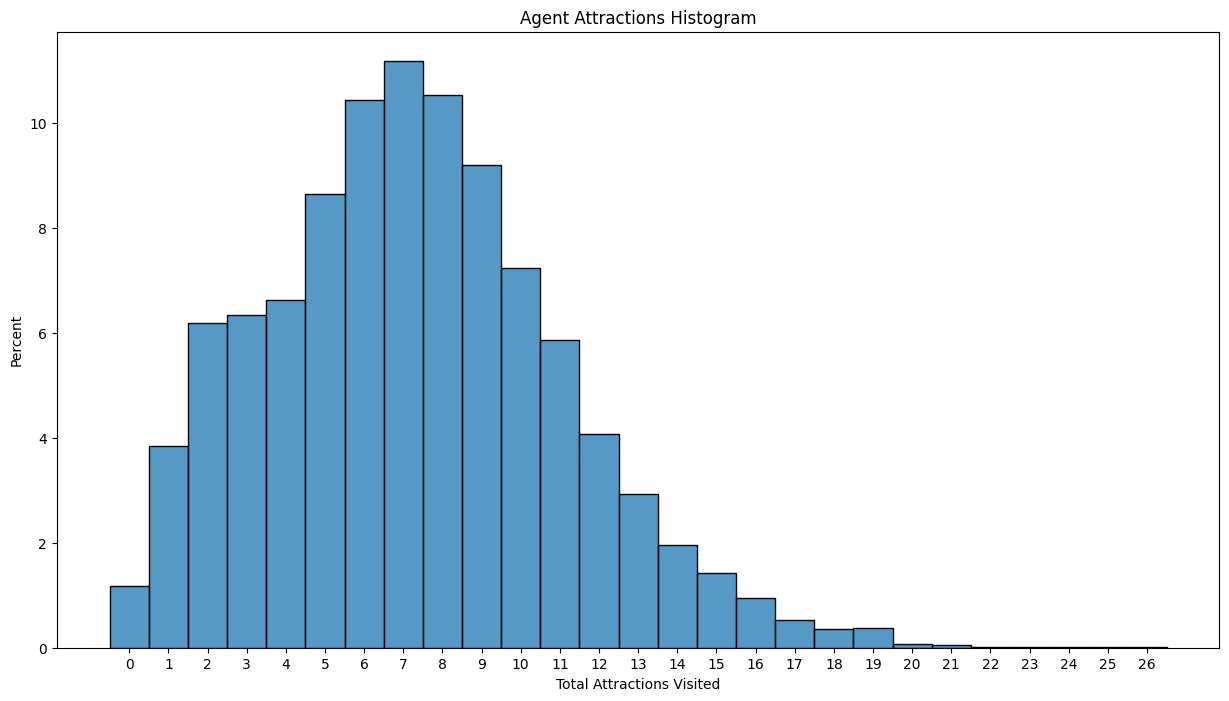

+----------+-----------------------------+
| Metric   |   Total Attractions Visited |
|----------+-----------------------------|
| count    |                    40000.00 |
| mean     |                        7.26 |
| std      |                        3.76 |
| min      |                        0.00 |
| 25%      |                        5.00 |
| 50%      |                        7.00 |
| 75%      |                       10.00 |
| max      |                       26.00 |
+----------+-----------------------------+


c:\Users\sebas\Desktop\Master ES\Quartille 3\2imn25 quantative\QUESTIONMARK\EftelingShapeland\Code\park.py:336: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, hue=hue, ci=None, estimator=estimator)


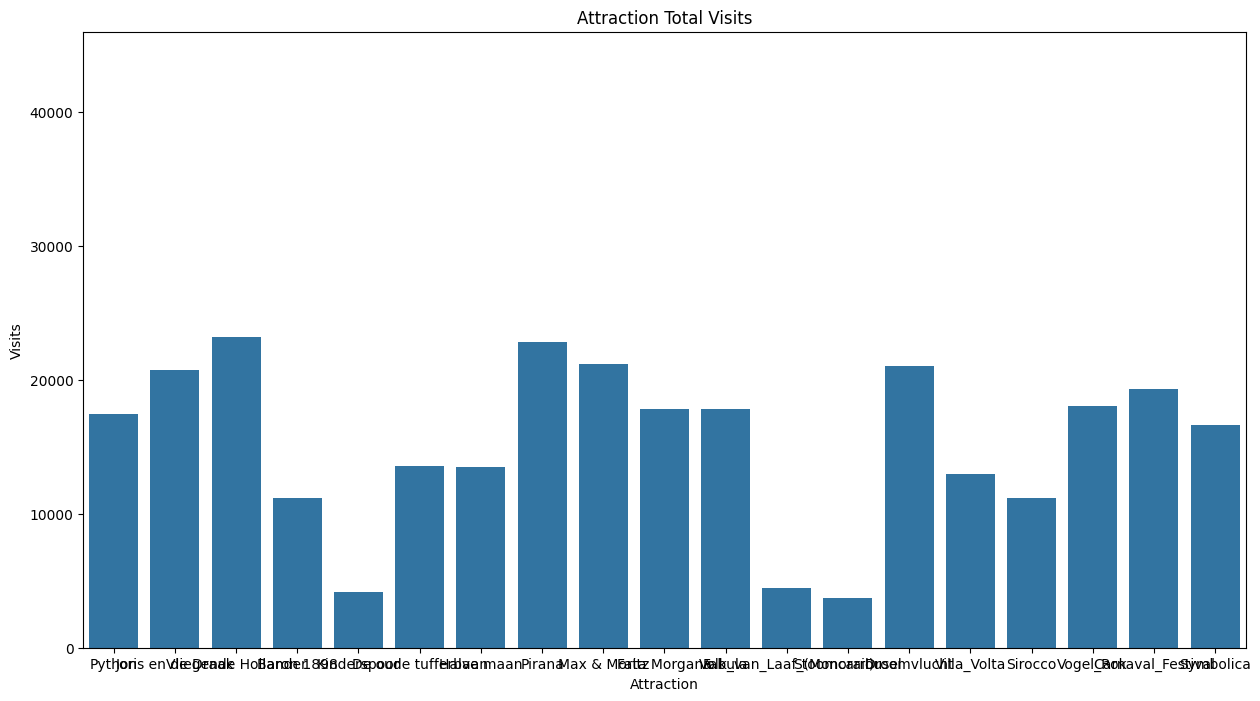

+--------------------------+----------+
| Attraction               |   Visits |
|--------------------------+----------|
| Baron 1898               |    11154 |
| Carnaval_Festival        |    19298 |
| De oude tufferbaan       |    13527 |
| Droomvlucht              |    21005 |
| Fabula                   |    17786 |
| Fata Morgana             |    17810 |
| Halve maan               |    13455 |
| Joris en de Draak        |    20741 |
| Kinderspoor              |     4165 |
| Max & Moritz             |    21189 |
| Pirana                   |    22798 |
| Python                   |    17421 |
| Sirocco                  |    11202 |
| Stoomcarrousel           |     3713 |
| Symbolica                |    16599 |
| Villa_Volta              |    12981 |
| Vliegende Hollander      |    23204 |
| Vogel_Rok                |    18016 |
| Volk_van_Laaf_(Monorail) |     4453 |
+--------------------------+----------+


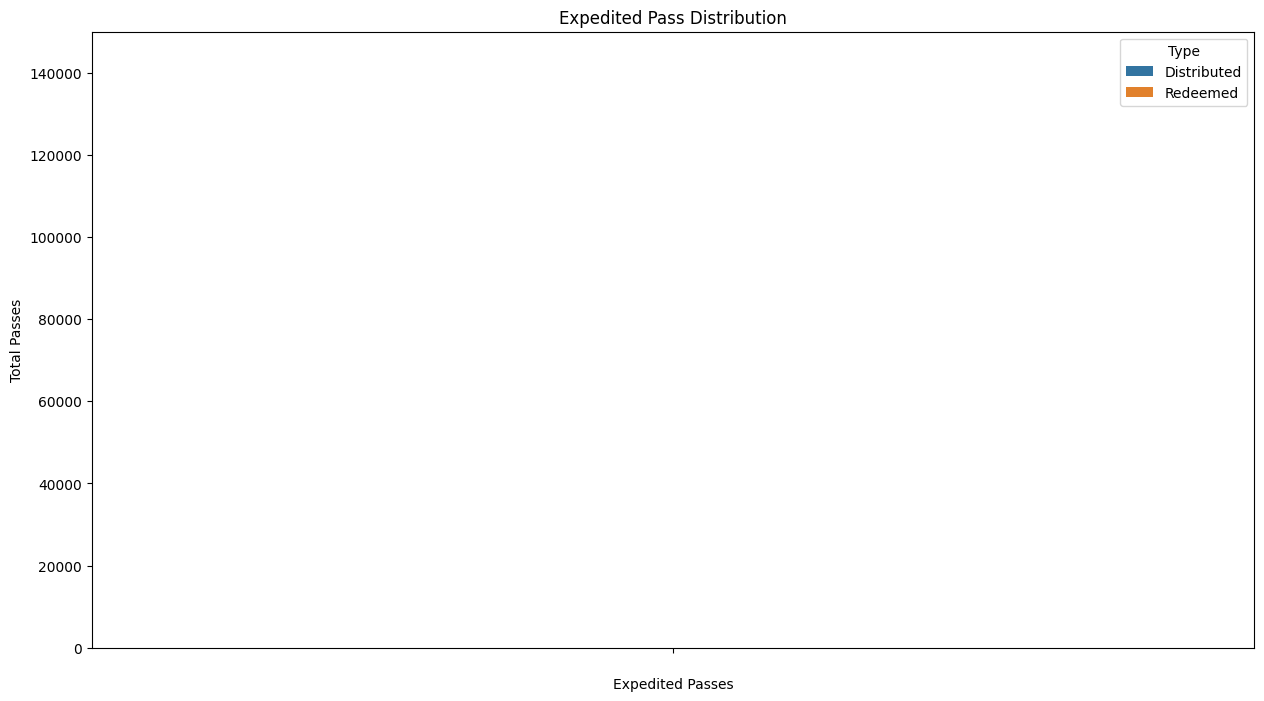

+--------------------+----------------+-------------+
| Expedited Passes   |   Total Passes | Type        |
|--------------------+----------------+-------------|
|                    |              0 | Distributed |
|                    |              0 | Redeemed    |
+--------------------+----------------+-------------+


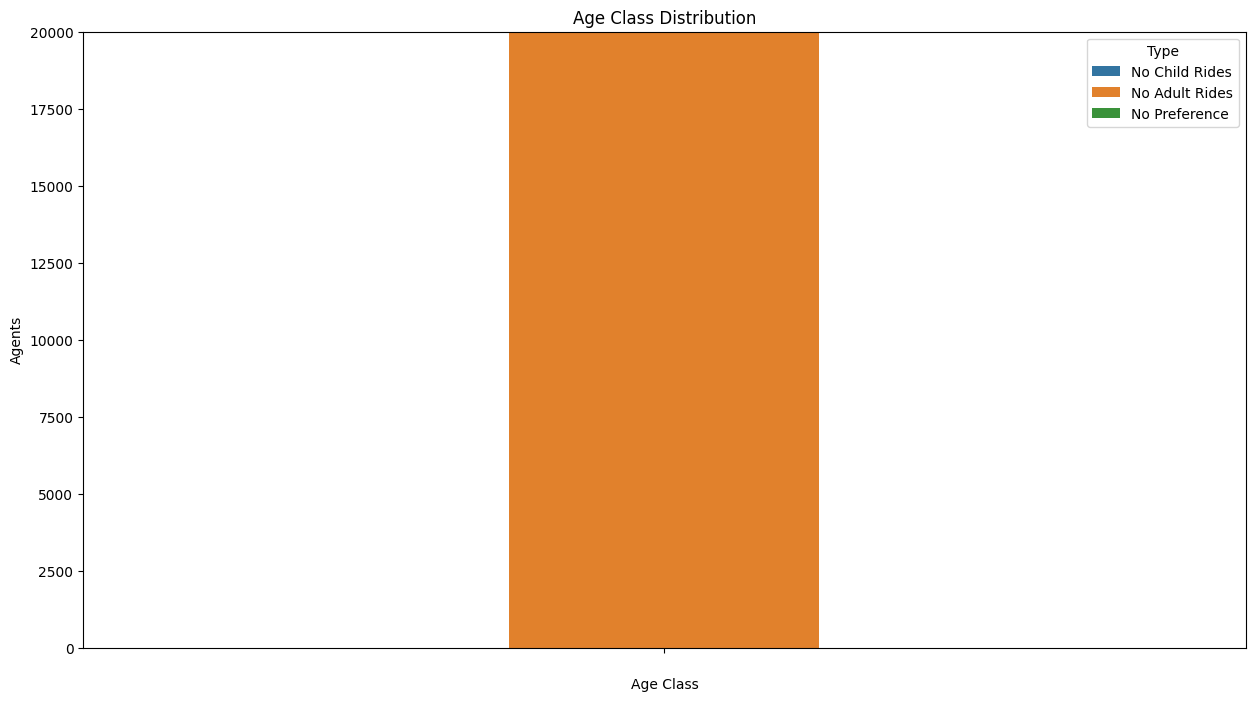

+-------------+----------+----------------+
| Age Class   |   Agents | Type           |
|-------------+----------+----------------|
|             |    40000 | No Adult Rides |
|             |        0 | No Child Rides |
|             |        0 | No Preference  |
+-------------+----------+----------------+
Agent ID: 31661
Agent Archetype: park_visitor
Agent arrived at park at time 288. Agent visited the activity merchandise at time 288. Agent exited the activity merchandise at time 332. Agent entered queue for Pirana at time 333. Agent boarded Pirana at time 399. Agent exited Pirana at time 406. Agent entered queue for Carnaval_Festival at time 407. Agent boarded Carnaval_Festival at time 464. Agent exited Carnaval_Festival at time 472. Agent entered queue for Vogel_Rok at time 473. Agent boarded Vogel_Rok at time 524. Agent exited Vogel_Rok at time 526. Agent entered queue for Volk_van_Laaf_(Monorail) at time 527. Agent boarded Volk_van_Laaf_(Monorail) at time 532. Agent exited Volk_v

In [8]:
# Initialize Park
RNG_SEED = 1005

park = Park(
    attraction_list=ATTRACTIONS,
    activity_list=ACTIVITIES,
    plot_range=PLOT_RANGE,
    random_seed=RNG_SEED,
    version=VERSION,
    verbosity=VERBOSITY
)

# Build Arrivals

park.generate_arrival_schedule(
    arrival_seed=HOURLY_PERCENT, 
    total_daily_agents=TOTAL_DAILY_AGENTS, 
    perfect_arrivals=PERFECT_ARRIVALS,
)

# Build Agents
park.generate_agents(
    behavior_archetype_distribution=AGENT_ARCHETYPE_DISTRIBUTION,
    exp_ability_pct=EXP_ABILITY_PCT,
    exp_wait_threshold=EXP_THRESHOLD,
    exp_limit=EXP_LIMIT
)

# Build Attractions + Activities
park.generate_attractions()
park.generate_activities()

# Pass Time
for _ in range(len(HOURLY_PERCENT.keys()) * 60):
    park.step()

# Save Parameters of Current Run
sim_parameters = {
    "VERSION": VERSION,
    "VERBOSITY": VERBOSITY,
    "SHOW_PLOTS": SHOW_PLOTS,
    "RNG_SEED": RNG_SEED,
    "TOTAL_DAILY_AGENTS": TOTAL_DAILY_AGENTS,
    "PERFECT_ARRIVALS": PERFECT_ARRIVALS,
    "HOURLY_PERCENT": HOURLY_PERCENT,
    "EXP_ABILITY_PCT": EXP_ABILITY_PCT,
    "EXP_THRESHOLD": EXP_THRESHOLD,
    "EXP_LIMIT": EXP_LIMIT,
    "AGENT_ARCHETYPE_DISTRIBUTION": AGENT_ARCHETYPE_DISTRIBUTION,
    "ATTRACTIONS": ATTRACTIONS,
    "ACTIVITIES": ACTIVITIES,
    "BEHAVIOR_ARCHETYPE_PARAMETERS": BEHAVIOR_ARCHETYPE_PARAMETERS,
}
park.write_data_to_file(
    data=sim_parameters, 
    output_file_path=f"data/{VERSION}/parameters", 
    output_file_format="json"
)

# Store + Print Data
park.make_plots(show=SHOW_PLOTS)
park.print_logs(N = 5)
#park.print_logs(selected_agent_ids = [778])

## Pool of Simulations
Run a set number of runs

In [9]:
from multiprocessing import Pool, cpu_count
from simulation import simulate

In [10]:
runs = 2
cores = cpu_count()
print(cores)

def create_park(seed: int):
    under_construction_park = Park(
    attraction_list=ATTRACTIONS,
    activity_list=ACTIVITIES,
    plot_range=PLOT_RANGE,
    random_seed=seed,
    version=VERSION,
    verbosity=VERBOSITY
    )

    # Build Arrivals
    
    under_construction_park.generate_arrival_schedule(
        arrival_seed=HOURLY_PERCENT, 
        total_daily_agents=TOTAL_DAILY_AGENTS, 
        perfect_arrivals=PERFECT_ARRIVALS,
    )

    # Build Agents
    under_construction_park.generate_agents(
        behavior_archetype_distribution=AGENT_ARCHETYPE_DISTRIBUTION,
        exp_ability_pct=EXP_ABILITY_PCT,
        exp_wait_threshold=EXP_THRESHOLD,
        exp_limit=EXP_LIMIT
    )
    
    # Build Attractions + Activities
    under_construction_park.generate_attractions()
    under_construction_park.generate_activities()
    return under_construction_park

simulation_parks = []
opening_hours = len(HOURLY_PERCENT.keys())
for i in range(runs):
    simulation_parks.append((create_park(i * 1000), opening_hours))

# Run simulations
with Pool() as pool:
    sim_results = pool.starmap(simulate, simulation_parks)
    

20


In [11]:
import pandas as pd
from tabulate import tabulate

def print_park_results(printed_park: Park):
    avg_queue_wait_time = []
            
    for attraction_name, attraction in printed_park.attractions.items():
        queue_wait_list = [
            val for time, val in attraction.history["queue_wait_time"].items()
            if time <= printed_park.park_close
        ]
        exp_queue_wait_list = [
            val for time, val in attraction.history["exp_queue_wait_time"].items()
            if time <= printed_park.park_close
        ]            
        avg_queue_wait_time.append(
            {
                "Attraction": attraction_name,
                "Average Wait Time": sum(queue_wait_list) / len(queue_wait_list),
                "Queue Type": "Standby"
            }
        )
    
    df = pd.DataFrame(avg_queue_wait_time)
    expected_wait_times = {attraction["name"]: attraction["expected_wait_time"] for attraction in ATTRACTIONS}
    df["Expected Wait Time"] = df.apply(lambda row: expected_wait_times[row["Attraction"]] if row["Queue Type"] == "Standby" else 0, axis=1)
    df["Wait Time Difference"] = abs(df["Expected Wait Time"] - df["Average Wait Time"])
    summed_value = df["Wait Time Difference"].sum()
    print(
    tabulate(
        df.sort_values('Attraction'),
        headers='keys',
        tablefmt='psql',
        showindex=False,
        floatfmt=('.2f')
    ))
    print(summed_value)
    
print_park_results(sim_results[0])
print_park_results(sim_results[1])


+--------------------------+---------------------+--------------+----------------------+------------------------+
| Attraction               |   Average Wait Time | Queue Type   |   Expected Wait Time |   Wait Time Difference |
|--------------------------+---------------------+--------------+----------------------+------------------------|
| Baron 1898               |               34.79 | Standby      |                59.50 |                  24.71 |
| Carnaval_Festival        |               29.45 | Standby      |                28.60 |                   0.85 |
| De oude tufferbaan       |               26.47 | Standby      |                30.00 |                   3.53 |
| Droomvlucht              |               42.57 | Standby      |                44.40 |                   1.83 |
| Fabula                   |               22.25 | Standby      |                16.70 |                   5.55 |
| Fata Morgana             |               29.04 | Standby      |                29.30 |